## Identifying Key Predictors of Breast Cancer Using Machine Learning Algorithms

# 1. Main Objective of the Analysis
The primary goal of this project is predictive, focusing on developing a reliable classification model that can distinguish between malignant and benign breast tumors. Although interpretability is also valuable—understanding which cell features most strongly correlate with malignancy—the immediate objective is to predict tumor status accurately for early medical intervention. From a healthcare or clinical standpoint, an accurate predictive model for breast cancer diagnosis provides significant benefits:

- Timely Detection: Early detection of malignant tumors can dramatically improve patient outcomes and reduce healthcare costs.

- Resource Allocation: Hospitals and clinics can prioritize high-risk patients for more thorough medical examinations and follow-up procedures, optimizing limited resources.

- Clinical Decision Support: Oncologists and medical professionals gain a data-driven tool that complements traditional diagnostic methods (e.g., imaging, biopsy) and enhances patient care.

# 2. Brief Description of the Dataset and Analysis Plan

Breast Cancer Wisconsin (Diagnostic) Dataset

- Dependent Variable (Target): Diagnosis (Benign = 0, Malignant = 1)

- Independent Variables: 30 numeric features describing cell nuclei characteristics (e.g., radius, texture, perimeter, area, smoothness, etc.)

In this analysis, we aim to:

- Clean and preprocess the data to handle any missing or inconsistent values and ensure the features are suitably scaled or transformed where necessary.
- Train and compare several machine learning classification models (e.g., Logistic Regression, Random Forest, Gradient Boosting ) to find the most effective approach for predicting malignancy.
- Evaluate model performance using appropriate metrics such as accuracy, precision, recall, and F1-score to ensure a balance between correctly detecting malignant cases (sensitivity) and avoiding false alarms.
- Interpret key drivers of the predictive model to understand which features are most influential in distinguishing malignant from benign cases—insights that could potentially guide medical professionals in diagnostic decisions.

Ultimately, the analysis aims to provide an accurate and interpretable predictive tool that can assist healthcare stakeholders in diagnosing breast cancer and improving patient outcomes.

In [1]:
import pandas as pd
# Use a raw string (r"") to avoid issues with backslashes in the file path
file_path = r"C:\Users\ams40\IBM\3 Supervised Machine Learning- Classification\Module 6\Final project\wdbc.data"

# If the dataset does not have column headers included, set header=None
data = pd.read_csv(file_path, header=None)

# Take a quick look at the data
print(data.head())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [2]:
# According to the dataset documentation, the columns might be:
column_names = [
    "ID",
    "Diagnosis",
    "Radius_mean",
    "Texture_mean",
    "Perimeter_mean",
    "Area_mean",
    "Smoothness_mean",
    "Compactness_mean",
    "Concavity_mean",
    "Concave_points_mean",
    "Symmetry_mean",
    "Fractal_dimension_mean",
    "Radius_se",
    "Texture_se",
    "Perimeter_se",
    "Area_se",
    "Smoothness_se",
    "Compactness_se",
    "Concavity_se",
    "Concave_points_se",
    "Symmetry_se",
    "Fractal_dimension_se",
    "Radius_worst",
    "Texture_worst",
    "Perimeter_worst",
    "Area_worst",
    "Smoothness_worst",
    "Compactness_worst",
    "Concavity_worst",
    "Concave_points_worst",
    "Symmetry_worst",
    "Fractal_dimension_worst",
]

data = pd.read_csv(file_path, header=None, names=column_names)
data.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 3. Data exploration, data cleaning, and feature engineering
- The data is cleaned by removing non-predictive columns and encoding the target variable.
- Standardization is applied to address feature scale disparities.


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Removing Non-Predictive Columns and Encoding the Target Variable
# Drop the ID column
data = data.drop(columns=['ID'])

# Encode the target variable (Diagnosis: M -> 1, B -> 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Checking for Missing Values
missing_values = data.isnull().sum().sum()
print(f"Missing Values: {missing_values}")

Missing Values: 0


## 3.1. Is the data Imbalanced?

In [4]:
data['Diagnosis'].value_counts()

0    357
1    212
Name: Diagnosis, dtype: int64

<AxesSubplot:>

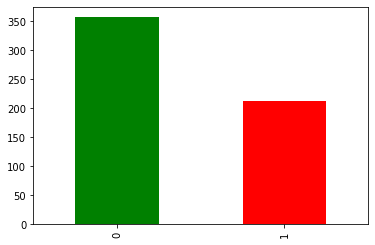

In [5]:
data['Diagnosis'].value_counts().plot.bar(color=['green', 'red'])

0 (Benign): 357  (~62.8%)

1 (Malignant): 212  (~37.2%)

the data is somewhat imbalanced but not severely.

- Impact on Models:

Logistic Regression: May produce biased predictions towards the majority class.

Random Forest: Less sensitive to imbalance due to bootstrapping but could still favor the majority class.

- Recommended Actions:
Class Weight Adjustment to give more weight to the minority class in models like Logistic Regression and Random Forest. 

Define a function to split our dataset to training and testing datasets:

In [6]:
rs = 123
def split_data(df):
    X = data.drop(columns=['Diagnosis'])
    y = data['Diagnosis']
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [7]:
# Split the training and testing dataset
X_train, X_test, y_train, y_test = split_data(data)

Standardization of Features (Z-score scaling)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on train and transform train data
X_test = scaler.transform(X_test)        # Transform test data using the same scaler

Display results

In [9]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (455, 30)
X_test Shape: (114, 30)
y_train Shape: (455,)
y_test Shape: (114,)


In [10]:
X = data.drop(columns=['Diagnosis'])
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.head()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,0.141726,-0.827244,0.033936,0.030985,-1.438793,-1.285234,-0.910522,-0.763774,-0.641358,-1.452675,...,0.037706,-0.628883,-0.107689,-0.073546,-1.385683,-1.141734,-1.070937,-0.853519,-0.611724,-1.507612
1,-0.440253,-0.680362,-0.431227,-0.495942,1.378014,0.074971,-0.356566,-0.407398,0.483286,0.471565,...,-0.550977,-0.684975,-0.604143,-0.569174,1.109982,-0.494368,-0.390067,-0.458134,0.418540,-0.480588
2,0.335719,1.406298,0.429507,0.219573,0.837687,1.209866,0.991173,0.983538,0.421810,0.369468,...,0.813789,1.768666,1.221629,0.661315,1.377532,2.212980,1.750168,1.342101,1.855965,0.822278
3,-0.721402,-1.985982,-0.737267,-0.683692,-0.742768,-0.830163,-0.920411,-1.014483,0.085502,-0.254456,...,-0.801523,-2.052026,-0.762728,-0.713675,-1.030413,-0.572005,-0.898697,-1.020621,0.805919,-0.538542
4,-1.081273,-1.055728,-1.043713,-0.928157,0.170811,-0.238609,-0.646710,-0.723104,-0.637742,1.028842,...,-1.098920,-0.992682,-1.064157,-0.903654,0.145050,-0.565794,-0.954634,-1.118174,-0.769973,0.048806


# 4. Analysis: three different classifier models

Define a grid search function for tuning our models:

In [11]:
from sklearn.model_selection import GridSearchCV
# Grid search hyperparameters for a logistic regression model
def grid_search_lr(X_train, y_train):
    params_grid = {
    'class_weight': [{0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
    }
    lr_model = LogisticRegression(random_state=rs, max_iter=1000)
    grid_search = GridSearchCV(estimator = lr_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

# Grid search hyperparameters for a random forest model
def grid_search_rf(X_train, y_train):
    params_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [25, 50, 100],
    'min_samples_split': [2, 5],
    'class_weight': [{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}]
    }
    rf_model = RandomForestClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return best_params

## 4.1. Logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=rs, max_iter=1000)
model1.fit(X_train, y_train)
preds = model1.predict(X_test)

# Display a sample of predictions
print("Sample Predictions:", preds[:10])

Sample Predictions: [0 0 1 1 0 1 1 1 1 1]


Evaluation Metrics:
- Precision: The proportion of correctly predicted positive instances out of all instances that were predicted as positive. It answers the question: “Of all the instances labeled as positive by the model, how many were actually positive?”

- Recall: The proportion of correctly predicted positive instances out of all actual positive instances. It answers the question: “Of all the actual positive instances, how many did the model successfully identify?”

- F-score (or F-beta score): A weighted average of precision and recall, used to evaluate the model’s performance. The beta parameter determines the balance between precision and recall:

A beta < 1 gives more weight to precision.
A beta > 1 gives more weight to recall.
When beta = 1, it is known as the F1 score, which gives equal importance to precision and recall.

In [13]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_test, preds)
precision, recall, fbeta, support = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Fscore: {fbeta:.2f}")
print(f"AUC: {auc:.2f}")

Accuracy: 0.97
Precision: 0.95
Recall: 0.98
Fscore: 0.98
AUC: 0.97


For machine learning tasks on imbalanced datasets like breast cancer detection, we often prioritize recall over precision. Our main goal is to catch all malignant tumors, accepting some false positives since they only lead to extra testing. Missing malignant cases, however, can be life-threatening. Hence, we emphasize maximizing recall first, while striving to maintain high precision to minimize unnecessary procedures. Achieving this balance helps ensure patient safety and supports accurate, efficient clinical decisions.

As all Evaluation Metrics are high enough, we dont need to be worry about balancing our dataset.

In [14]:
import pandas as pd
import numpy as np

# Extract feature names from training data
feature_names = data.drop(columns=['Diagnosis']).columns  # Get feature names from the original DataFrame

# Extract coefficients from the logistic regression model
coefficients = model1.coef_.flatten()  # Flatten to a 1D array if necessary

# Create a DataFrame to store features and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)  # To sort by importance
})

# Sort by absolute value of coefficients to find the most important predictors
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Main Drivers (Predictors):")
print(coef_df.head(10))


Top 10 Main Drivers (Predictors):
                 Feature  Coefficient  Absolute Coefficient
21         Texture_worst     1.326243              1.326243
10             Radius_se     1.191549              1.191549
28        Symmetry_worst     1.003767              1.003767
20          Radius_worst     0.956541              0.956541
24      Smoothness_worst     0.922726              0.922726
26       Concavity_worst     0.902049              0.902049
6         Concavity_mean     0.846807              0.846807
13               Area_se     0.844810              0.844810
23            Area_worst     0.840843              0.840843
27  Concave_points_worst     0.830406              0.830406


## 4.2. Random Forest
A method to define and train a random forest:

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model2 = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model   
    model2.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model2.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model2

A method to evaluate a classifier's predictions:

In [16]:
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

RandomForestClassifier has many hyperparameters that need to be tuned. we use the provided grid_search_rf() method to play with hyperparameter tuning and find the best parameters

In [17]:
best_params = grid_search_rf(X_train, y_train)
print("Best parameters:", best_params)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'class_weight': {0: 0.3, 1: 0.7}, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [18]:
# Tuned random forest parameters
best_params = {'bootstrap': True,
                         'class_weight': {0: 0.3, 1: 0.7}, 
                         'max_depth': 5, 
                         'min_samples_split': 2, 
                         'n_estimators': 100}
results = []
preds, model2 = build_rf(X_train, y_train, X_test, best_params=best_params)
result = evaluate(y_test, preds, "Original")
print(result)
results.append(result)

{'type': 'Original', 'accuracy': 0.9473684210526315, 'recall': 0.9761904761904762, 'auc': 0.9533730158730159, 'precision': 0.8913043478260869, 'fscore': 0.9726277372262774}


In [19]:
precision, recall, f_beta, support = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
auc = roc_auc_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Fscore: {f_beta:.2f}")
print(f"AUC: {auc:.2f}")

Accuracy: 0.95
Precision: 0.89
Recall: 0.98
Fscore: 0.97
AUC: 0.95


You can identify the main predictors by using the Random Forest model’s built-in feature importance scores. After training your model, access the .feature_importances_ attribute, sort the features by their scores, and visualize or print the top predictors. This shows which features contribute most to reducing impurity and driving predictions. 

Perimeter_worst         0.158911
Concave_points_worst    0.151697
Concave_points_mean     0.112104
Radius_worst            0.099085
Area_worst              0.080310
Concavity_mean          0.058363
Perimeter_mean          0.055360
Area_se                 0.046600
Concavity_worst         0.038817
Area_mean               0.027898
dtype: float64


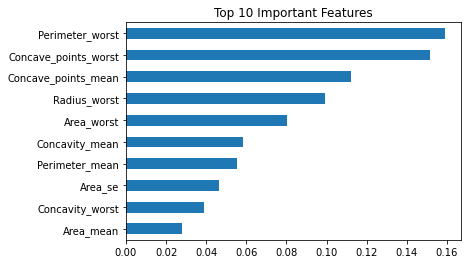

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
feature_names = list(data.drop(columns=['Diagnosis']).columns)


# Get and sort feature importances
importance = model2.feature_importances_
features = pd.Series(importance, index=feature_names).sort_values(ascending=False)


# Display top features
print(features.head(10))

# Plot top features
features.head(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()

## 4.3. GradientBoosting

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

tree_list = [15, 25, 50, 100]
# Define parameter grid
param_grid = {
    'n_estimators': tree_list,
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'subsample': [1.0, 0.5],
    'max_features': [1, 2, 3, 4]
}

# Grid Search for best parameters
GV_GBC = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
GV_GBC.fit(X_train, y_train)

# Best model
best_model = GV_GBC.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # For AUC calculation

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"Fscore : {fscore:.2f}")
print(f"AUC : {auc:.2f}")


Accuracy : 0.96
Precision : 0.91
Recall : 0.98
Fscore : 0.94
AUC : 0.98


                 Feature  Importance
27  Concave_points_worst    0.269734
22       Perimeter_worst    0.201756
20          Radius_worst    0.172630
6         Concavity_mean    0.040363
13               Area_se    0.031594
7    Concave_points_mean    0.026738
25     Compactness_worst    0.024808
23            Area_worst    0.024172
1           Texture_mean    0.023092
28        Symmetry_worst    0.020591


<Figure size 720x432 with 0 Axes>

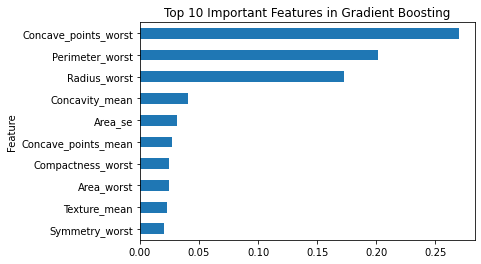

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = list(data.drop(columns=['Diagnosis']).columns)


# Assuming your trained Gradient Boosting model is called 'gb_model'
feature_importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the top 10 features
print(feature_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top 10 Important Features in Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()


Comparison of Models' performance:

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define a function to evaluate metrics and store them in a dictionary
def evaluate_and_store_metrics(model_name, y_test, y_pred, y_pred_proba):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Fscore': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_pred_proba)
    }

# List to store results for each model
results = []

# Assuming these are your models and they are already fitted
models = {
    'Logistic Regression': model1,
    'Random Forest': model2,
    'Gradient Boosting': best_model  # from your GV_GBC.best_estimator_
}

# Evaluate and store metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC calculation
    results.append(evaluate_and_store_metrics(model_name, y_test, y_pred, y_pred_proba))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Print the table
print(results_df)


                 Model  Accuracy  Precision   Recall    Fscore       AUC
0  Logistic Regression  0.973684   0.953488  0.97619  0.964706  0.987434
1        Random Forest  0.947368   0.891304  0.97619  0.931818  0.990410
2    Gradient Boosting  0.956140   0.911111  0.97619  0.942529  0.982143


# 5. The best model

Based on the performance metrics in the table, I recommend the Logistic Regression model as the final choice. It offers the highest accuracy (0.9737) and a strong balance across precision (0.9535), recall (0.9762), F-score (0.9647), and AUC (0.9874). While Random Forest provides a slightly higher AUC (0.9904), it has lower precision (0.8913) compared to Logistic Regression. Additionally, Logistic Regression is more interpretable due to its simpler structure and well-understood coefficients, making it easier to explain the impact of each predictor on the outcome. This combination of high performance and interpretability makes Logistic Regression the most suitable model for our needs.

## 5.1. Key Findings and Insights from Logistic Regression Model
The logistic regression model has identified the top 10 main drivers influencing the outcome, as indicated by their coefficients. The feature Texture_worst has the highest positive coefficient (1.3262), suggesting that higher values significantly increase the likelihood of the target class. Similarly, Radius_se (1.1915) and Symmetry_worst (1.0038) also play critical roles, implying that variations in these features strongly influence predictions.

Concavity_worst (0.9020) and Concavity_mean (0.8468) highlight the importance of concavity-related features in determining the outcome. The inclusion of Area_worst (0.8408) and Smoothness_worst (0.9227) suggests that both size and smoothness of cell nuclei are significant predictors.

Overall, the model emphasizes the relevance of shape, size, and texture characteristics in distinguishing between classes, providing actionable insights for further investigation and potential clinical applications.


# 6. Suggestions for Next Steps in Data Analysis
To enhance both the predictive power and explainability of the model, the following steps are recommended:

Feature Engineering: Create new features that may capture hidden patterns, such as combining related metrics (e.g., combining texture and concavity measures) or generating ratios between features like radius and area.

Incorporate External Data: If available, integrate additional clinical data (e.g., patient history, genetic markers) to provide a more holistic model, potentially improving accuracy and interpretability.

Dimensionality Reduction: Techniques such as PCA (Principal Component Analysis) or Lasso Regression can help identify and retain only the most important features, reducing noise and improving model clarity.

Model Comparison: Consider exploring other interpretable models like Support Vector Machines (SVM) with linear kernels or Decision Trees, which also offer feature importance metrics.